<a href="https://colab.research.google.com/github/NSR9/EVA8/blob/main/Session-8/Session_8_Assignment_Modularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/albumentations-team/albumentations.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-vsmxx4sx
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-vsmxx4sx
  Resolved https://github.com/albumentations-team/albumentations.git to commit 87b1b7d009bcff12d9cc7a482c14cac0b1300ac8
  Preparing metadata (setup.py) ... done
  Created wheel for albumentations: filename=albumentations-1.3.0-py3-none-any.whl size=125641 sha256=9853888e76a9c14052f696c6ecae698675b941e92a82777329a43abbee64fab5
  Stored in directory: /tmp/pip-ephem-wheel-cache-3il0rnpv/wheels/bf/89/e3/323a3ae2345101d172eadac18193e5c6d1d2111201a624620a
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentat

In [3]:
!git clone https://github.com/avinash3147/eva_pytorch_wrapper.git /content/drive/MyDrive/EVA8/eva_pytorch_wrapper

Cloning into '/content/drive/MyDrive/EVA8/eva_pytorch_wrapper'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 79 (delta 33), reused 60 (delta 17), pack-reused 0
Unpacking objects: 100% (79/79), 606.91 KiB | 596.00 KiB/s, done.


In [4]:
%cd "/content/drive/MyDrive/EVA8"

/content/drive/MyDrive/EVA8


## **Import Custom Libraries** from eva_pytorch_wrapper repo

In [5]:
from __future__ import print_function
import torch
import torchvision
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

# Custom Libraries
from eva_pytorch_wrapper.models.resnet import ResNet18
from eva_pytorch_wrapper.models.custom_resnet import CustomResnet
from eva_pytorch_wrapper.utils.graph_utility import two_variable_plot, plot_accuracy_loss_curves, plot_misclassified_images
from eva_pytorch_wrapper.utils.misc import process_cnfig, get_data_loader_args, check_cuda_availability,\
    get_model_summary, lr_finder, load_optimizer, get_wrong_predictions, run_epochs
from eva_pytorch_wrapper.utils.data_utility import download_train_data, download_test_data, load_train_data, \
    load_test_data, get_train_transformations, get_test_transformations

## **Load Configuration File**

In [7]:
config = process_cnfig(file_name='/content/drive/MyDrive/EVA8/eva_pytorch_wrapper/config/config.yaml')

********** Loading configuration... **********


## **Train and Test Transforms**

In [8]:
train_transforms = get_train_transformations(
    data_augmentation_type= config['data_augmentation']['type'],
    mean= config['mean']['value'],
    std= config['std']['value']
) # Get Train Transformations

test_transforms = get_test_transformations(
    data_augmentation_type= config['data_augmentation']['type'],
    mean= config['mean']['value'],
    std= config['std']['value']
) # Get Test Tranformations

## **Download Train and Test Data**

In [9]:
train_data = download_train_data(
    dataset_type= config['data_set']['type'],
    train_transforms= train_transforms
) # Get Train Data

test_data = download_test_data(
    dataset_type= config['data_set']['type'],
    test_transforms= test_transforms
) # Get Test Data

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## **Load Train and Test Data**

In [10]:
cuda = check_cuda_availability() # Check if cuda is available or not

data_loader_args = get_data_loader_args(cuda=cuda) # Get Data Loader Arguments

train_loader = load_train_data(
    train_data= train_data,
    **data_loader_args
) # Load Train Data

test_loader = load_test_data(
    test_data= test_data,
    **data_loader_args
) # Load Test Data

device = torch.device("cuda" if cuda else "cpu")

## **Model Summary**

In [11]:
model = eval(config['model']['type'])().to(device)

get_model_summary(
    model= model,
    input_size= config['input_size']['value']
) # Get Model Summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## **LR Finder**

In [12]:
lr_train_accuracy, test_lr = lr_finder(
    train_loader= train_loader,
    device= device,
    model= model,
    max_lr=config['max_lr']['value'],
    min_lr=config['min_lr']['value'],
    epochs=config['lr_finder_epochs']['value'],
    momentum=config['momentum']['value'],
    weight_decay=config['weight_decay']['value']
)

epoch = 1 Lr = 0.001  Loss=1.4825639724731445 Batch_id=97 Accuracy=37.03: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
epoch = 2 Lr = 0.0029  Loss=1.282240390777588 Batch_id=97 Accuracy=41.97: 100%|██████████| 98/98 [00:24<00:00,  3.94it/s]
epoch = 3 Lr = 0.0048  Loss=1.3062806129455566 Batch_id=97 Accuracy=42.05: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.2352296113967896 Batch_id=97 Accuracy=38.25: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
epoch = 5 Lr = 0.0086  Loss=1.378053069114685 Batch_id=97 Accuracy=32.62: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
epoch = 6 Lr = 0.0105  Loss=1.6600961685180664 Batch_id=97 Accuracy=23.69: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.909290075302124 Batch_id=97 Accuracy=18.94: 100%|██████████| 98/98 [00:25<00:00,  3.77it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.978029489517212 Batch_id=97 Accuracy=18.77: 100%|██████████| 98/98 [00:

********************************


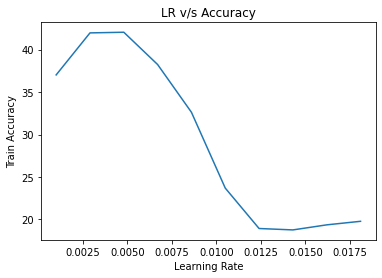

********************************


In [13]:
two_variable_plot(
    x= test_lr,
    y= lr_train_accuracy,
    xlabel= "Learning Rate",
    ylabel= "Train Accuracy",
    title= "LR v/s Accuracy"
) # Plot Accuracy vs LR

## **Load Optimizer**

In [14]:
optimizer = load_optimizer(
    model= model,
    learning_rate= config['learning_rate']['value'],
    momentum=config['momentum']['value'], 
    weight_decay=config['optimizer_weight_decay']['value']
) # load Optimizer

## **Run Train and Test Loop**

In [16]:
train_accuracy, train_losses, test_accuracy, test_losses, LR = run_epochs(
    train_loader= train_loader, 
    test_loader= test_loader, 
    device= device, 
    model= model, 
    optimizer= optimizer, 
    max_lr = config['max_lr']['value'],
    train_epochs= config['train_epochs']['value'], 
    pct_start= config['pct_start']['value'], 
    anneal_strategy= config['anneal_strategy']['value'],
    cycle_momentum= config['cycle_momentum']['value'],
    base_momentum= config['base_momentum']['value'],
    max_momentum= config['max_momentum']['value'],
    div_factor= config['div_factor']['value'],
    final_div_factor= config['final_div_factor']['value']
) # Run Train and Test Loop

EPOCH: 1 LR: 0.002


Loss=1.222569227218628 Batch_id=97 Accuracy=40.72: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



Test set: Average loss: 0.0026, Accuracy: 5393/10000 (53.93%)

EPOCH: 2 LR: 0.006502480958895718


Loss=1.126226544380188 Batch_id=97 Accuracy=56.43: 100%|██████████| 98/98 [00:26<00:00,  3.70it/s]



Test set: Average loss: 0.0022, Accuracy: 6136/10000 (61.36%)

EPOCH: 3 LR: 0.011004961917791435


Loss=0.8941907286643982 Batch_id=97 Accuracy=65.99: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]



Test set: Average loss: 0.0017, Accuracy: 7083/10000 (70.83%)

EPOCH: 4 LR: 0.015507442876687155


Loss=0.8762430548667908 Batch_id=97 Accuracy=70.79: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



Test set: Average loss: 0.0016, Accuracy: 7243/10000 (72.43%)

EPOCH: 5 LR: 0.01999801553274371


Loss=0.687553882598877 Batch_id=97 Accuracy=75.78: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]



Test set: Average loss: 0.0015, Accuracy: 7614/10000 (76.14%)

EPOCH: 6 LR: 0.01909765538868609


Loss=0.5024750828742981 Batch_id=97 Accuracy=80.38: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]



Test set: Average loss: 0.0012, Accuracy: 7924/10000 (79.24%)

EPOCH: 7 LR: 0.018197295244628466


Loss=0.4539174437522888 Batch_id=97 Accuracy=82.34: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]



Test set: Average loss: 0.0011, Accuracy: 8196/10000 (81.96%)

EPOCH: 8 LR: 0.01729693510057084


Loss=0.41762083768844604 Batch_id=97 Accuracy=84.28: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]



Test set: Average loss: 0.0013, Accuracy: 7838/10000 (78.38%)

EPOCH: 9 LR: 0.016396574956513216


Loss=0.3347751200199127 Batch_id=97 Accuracy=86.33: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]



Test set: Average loss: 0.0010, Accuracy: 8288/10000 (82.88%)

EPOCH: 10 LR: 0.015496214812455595


Loss=0.3862503468990326 Batch_id=97 Accuracy=87.86: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]



Test set: Average loss: 0.0009, Accuracy: 8434/10000 (84.34%)

EPOCH: 11 LR: 0.01459585466839797


Loss=0.3398081362247467 Batch_id=97 Accuracy=88.62: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]



Test set: Average loss: 0.0008, Accuracy: 8611/10000 (86.11%)

EPOCH: 12 LR: 0.013695494524340348


Loss=0.3508572578430176 Batch_id=97 Accuracy=89.88: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



Test set: Average loss: 0.0008, Accuracy: 8607/10000 (86.07%)

EPOCH: 13 LR: 0.012795134380282725


Loss=0.3430391550064087 Batch_id=97 Accuracy=90.54: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]



Test set: Average loss: 0.0008, Accuracy: 8731/10000 (87.31%)

EPOCH: 14 LR: 0.011894774236225102


Loss=0.23337534070014954 Batch_id=97 Accuracy=91.49: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



Test set: Average loss: 0.0010, Accuracy: 8304/10000 (83.04%)

EPOCH: 15 LR: 0.01099441409216748


Loss=0.2546903192996979 Batch_id=97 Accuracy=92.36: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]



Test set: Average loss: 0.0008, Accuracy: 8685/10000 (86.85%)

EPOCH: 16 LR: 0.010094053948109857


Loss=0.20041696727275848 Batch_id=97 Accuracy=93.36: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]



Test set: Average loss: 0.0009, Accuracy: 8480/10000 (84.80%)

EPOCH: 17 LR: 0.009193693804052234


Loss=0.17288218438625336 Batch_id=97 Accuracy=94.05: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]



Test set: Average loss: 0.0007, Accuracy: 8815/10000 (88.15%)

EPOCH: 18 LR: 0.008293333659994611


Loss=0.23435097932815552 Batch_id=97 Accuracy=94.55: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



Test set: Average loss: 0.0007, Accuracy: 8855/10000 (88.55%)

EPOCH: 19 LR: 0.0073929735159369864


Loss=0.13967843353748322 Batch_id=97 Accuracy=95.44: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



Test set: Average loss: 0.0007, Accuracy: 8881/10000 (88.81%)

EPOCH: 20 LR: 0.006492613371879362


Loss=0.12370126694440842 Batch_id=97 Accuracy=95.97: 100%|██████████| 98/98 [00:25<00:00,  3.89it/s]



Test set: Average loss: 0.0007, Accuracy: 8911/10000 (89.11%)

EPOCH: 21 LR: 0.005592253227821739


Loss=0.11253122985363007 Batch_id=97 Accuracy=96.52: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]



Test set: Average loss: 0.0007, Accuracy: 8908/10000 (89.08%)

EPOCH: 22 LR: 0.004691893083764116


Loss=0.08909299224615097 Batch_id=97 Accuracy=97.09: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]



Test set: Average loss: 0.0006, Accuracy: 9028/10000 (90.28%)

EPOCH: 23 LR: 0.0037915329397064934


Loss=0.07658335566520691 Batch_id=97 Accuracy=97.56: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]



Test set: Average loss: 0.0005, Accuracy: 9115/10000 (91.15%)

EPOCH: 24 LR: 0.0028911727956488706


Loss=0.0639895647764206 Batch_id=97 Accuracy=97.97: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



Test set: Average loss: 0.0005, Accuracy: 9121/10000 (91.21%)



********************************


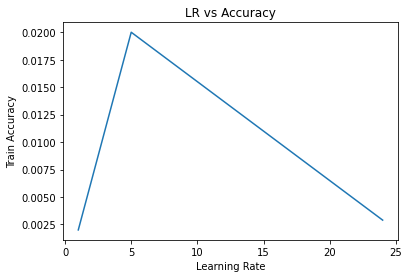

********************************


In [17]:
import numpy as np

two_variable_plot(
    x= np.arange(1, 25),
    y=LR,
    xlabel="Learning Rate",
    ylabel="Train Accuracy",
    title="LR vs Accuracy"
) # Plot LR vs Accuracy

## **Accurcay and Loss Plots**

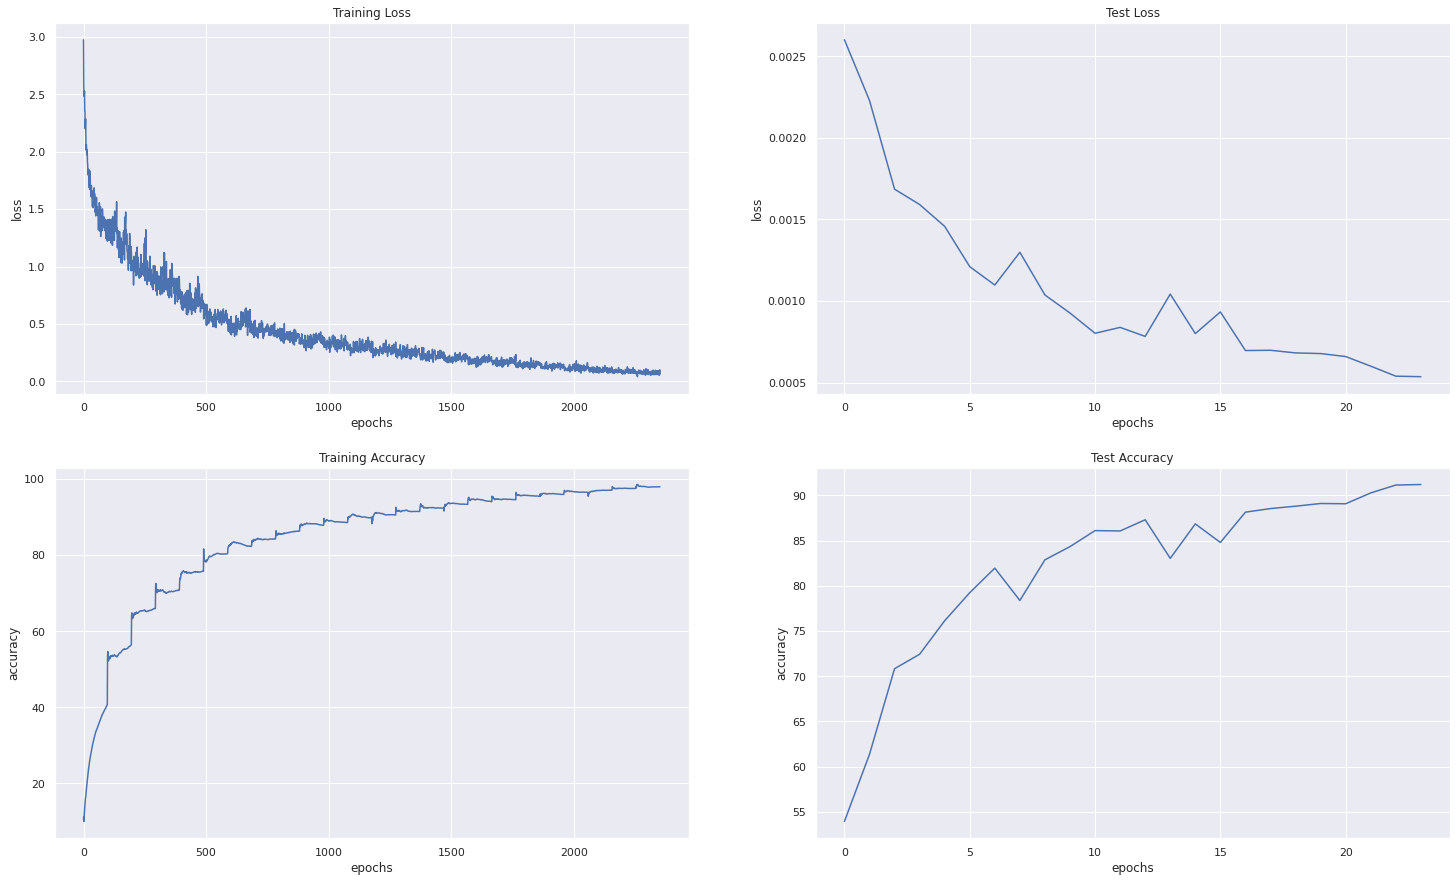

In [18]:
plot_accuracy_loss_curves(
    train_accuracy= train_accuracy, 
    test_accuracy= test_accuracy, 
    train_losses= train_losses, 
    test_losses= test_losses
) # Plot Accuracy And Loss Curves

## **List wrong Predictions**

In [19]:
wrong_predictions, wrong_images, correct_label = get_wrong_predictions(
    model=model,
    test_loader= test_loader,
    device=device
) # Get Wrong Predictions

Total wrong predictions are 879


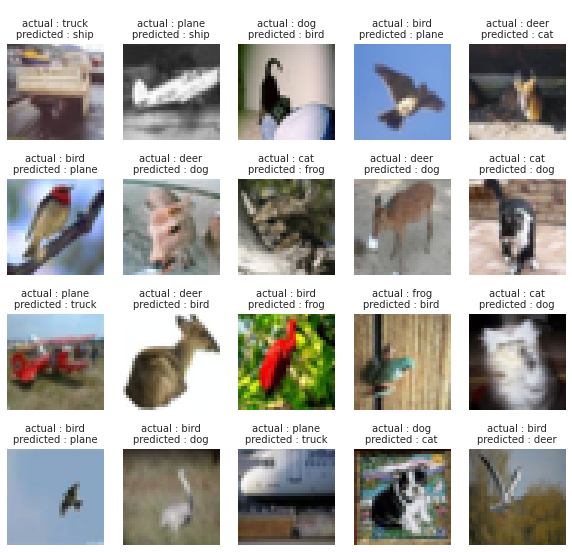

In [20]:
plot_misclassified_images(
    wrong_predictions= wrong_predictions,
    classes=config['classes']['value'],
    mean=config['mean']['value'],
    std=config['std']['value']
)